In [21]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




# Step-1 : Business Problem Understanding 
          # This project is about the predictions of the diabetes patients, Is they have diabetes or not depending upon the various medical tests like Glucose level, BloodPressure,Insulin,...

# Step-2 : Data Understanding

df = pd.read_csv("diabetes.csv")
print(df)

print(df.info())
print("-"*100)


print(df["Pregnancies"].unique())
print(df["Glucose"].unique())
print(df["BloodPressure"].unique())
print(df["SkinThickness"].unique())
print(df["Insulin"].unique())
print(df["BMI"].unique())
print(df["DiabetesPedigreeFunction"].unique())
print(df["Age"].unique())
print(df["Outcome"].unique())
print("-"*100)

print(df["Pregnancies"].value_counts())
print(df["Glucose"].value_counts())
print(df["BloodPressure"].value_counts())
print(df["SkinThickness"].value_counts())
print(df["Insulin"].value_counts())
print(df["BMI"].value_counts())
print(df["DiabetesPedigreeFunction"].value_counts())
print(df["Age"].value_counts())
print(df["Outcome"].value_counts())


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

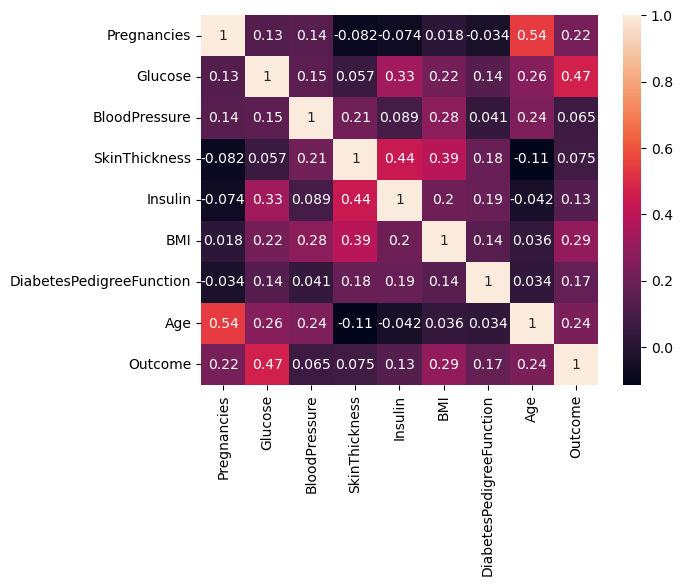

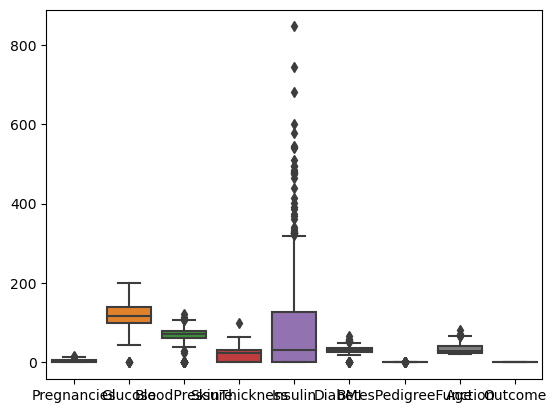

In [22]:
print(df.describe())
print("-"*100)

print(df.corr())
print("-"*100)

sns.heatmap(df.corr(),annot=True)
plt.show()

sns.boxplot(df)
plt.show()

In [33]:
# Step-3 : Data Preprocessing

# Data Cleaning : 

print(df.isnull().sum())
print("-"*100)

print(df.duplicated().sum())
print("-"*100)


# Data Wrandling : 

# In this dataset two input columns are continous variables and one output column is discrete categorical which is already converted into discrete count, 
# So there no need of converting them into discrete numeriacal, So no need of Data Wrangling.


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
----------------------------------------------------------------------------------------------------
0
----------------------------------------------------------------------------------------------------


In [77]:
# Step-4 : Split the dataset into two parts train data and test data

X = df.drop("Outcome",axis=1)
print(X)
print("-"*100)

y = df["Outcome"]
print(y)
print("-"*100)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=999)
print(X_train)
print("-"*100)


# In this dataset we have columns with high mangnitude as compared to other some columns, So we need to do scaling here

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[:,1:8] = scaler.fit_transform(X_train[:,1:8])
X_test[:,1:8] = scaler.transform(X_test[:,1:8])
print(X_train)
X_train[:,1:8]

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


InvalidIndexError: (slice(None, None, None), slice(1, 8, None))

In [78]:
# Modelling :

from sklearn.linear_model import LogisticRegression
best_model = LogisticRegression()
best_model.fit(X_train,y_train)




C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [79]:
# Step-5 : Predictions :

ypred_train = best_model.predict(X_train)
print(X_train)
print("-"*100)
ypred_test = best_model.predict(X_test)
print(X_test)
print("-"*100)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
79             2      112             66             22        0  25.0   
379            0       93            100             39       72  43.4   
267            2      128             64             42        0  40.0   
351            4      137             84              0        0  31.2   
730            3      130             78             23       79  28.4   
..           ...      ...            ...            ...      ...   ...   
225            1       87             78             27       32  34.6   
712           10      129             62             36        0  41.2   
481            0      123             88             37        0  35.2   
348            3       99             62             19       74  21.8   
448            0      104             64             37       64  33.6   

     DiabetesPedigreeFunction  Age  
79                      0.307   24  
379                     1.021   35  


In [81]:
# Evaluation : 

from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train,ypred_train)
print("train_accuracy:",train_accuracy)
test_accuracy = accuracy_score(y_test,ypred_test)
print("test_accuracy:",test_accuracy)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_model,X,y,cv=5)
print("cross_val_score:",scores.mean())

train_accuracy: 0.7752442996742671
test_accuracy: 0.8116883116883117
cross_val_score: 0.7695696460402341


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[[93  8]
 [21 32]]


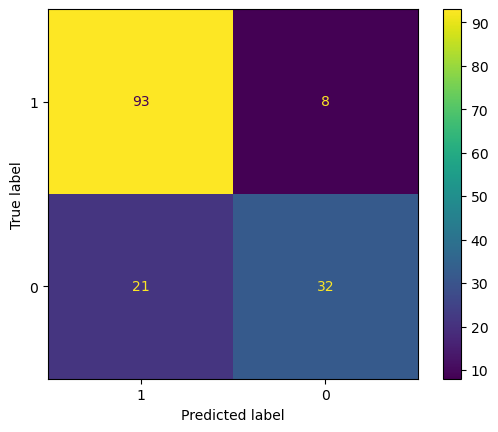

In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,ypred_test)
print(confusion_matrix)

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix,display_labels=df["Outcome"].unique()).plot()
plt.show()

In [88]:
from sklearn.metrics import classification_report
classification_report = classification_report(y_test,ypred_test)
print(classification_report)

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       101
           1       0.80      0.60      0.69        53

    accuracy                           0.81       154
   macro avg       0.81      0.76      0.78       154
weighted avg       0.81      0.81      0.80       154



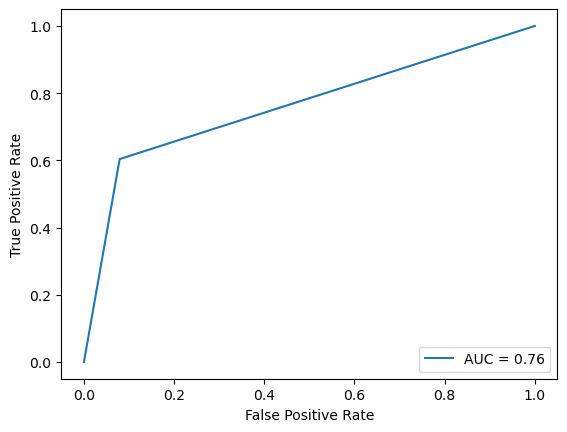

In [89]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay
fpr,tpr,thresholds= roc_curve(y_test,ypred_test)
roc_auc = auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

In [90]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,ypred_test)

0.7622828320567906